In [21]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse
from math import atan2, cos, sin, sqrt, pi
import matplotlib.pyplot as plt

In [22]:
cv.__version__

'3.4.1'

In [23]:
def drawAxis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)
    
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

In [38]:
def getOrientation(pts, img):
    
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = pts[i,0,0]
        data_pts[i,1] = pts[i,0,1]
    # Perform PCA analysis
    mean = np.empty((0))
    print(mean)
    mean, M = cv.PCACompute(data_pts, mean)
    eigenvalues, eigenvectors = np.linalg.eig(M)
    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    
    
    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1])
    drawAxis(img, cntr, p1, (0, 255, 0), 1)
    drawAxis(img, cntr, p2, (255, 255, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    
    return angle

[]


C:\D\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
C:\D\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


ValueError: math domain error

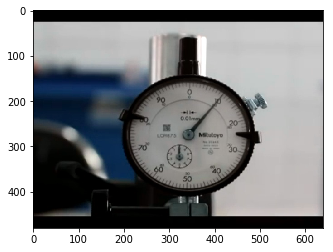

In [39]:
"""parser = argparse.ArgumentParser(description='Code for Introduction to Principal Component Analysis (PCA) tutorial.\
                                              This program demonstrates how to use OpenCV PCA to extract the orientation of an object.')
parser.add_argument('--input', help='Path to input image.', default='../Gauge/frames/frame1.jpg')
args = parser.parse_args()"""
src = cv.imread("../Gauge/frames/frame1.jpg")
# Check if image is loaded successfully
if src is None:
    print('Could not open or find the image: ')
    exit(0)
plt.imshow(src)
# Convert image to grayscale
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# Convert image to binary
_, bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
_, contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
for i, c in enumerate(contours):
    # Calculate the area of each contour
    area = cv.contourArea(c);
    # Ignore contours that are too small or too large
    if area < 1e2 or 1e5 < area:
        continue
    # Draw each contour only for visualisation purposes
    cv.drawContours(src, contours, i, (0, 0, 255), 2);
    # Find the orientation of each shape
    getOrientation(c, src)
plt.imshow(src)
#cv.waitKey()

Matrix [[ 0.99985782 -0.01686226]
 [ 0.01686226  0.99985782]]
Mean [[ 86.5        451.24683544]]
eigenvalues [0.99985782+0.01686226j 0.99985782-0.01686226j]
eigenvectors [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
p1    ((86.0141401249228+0.0002384683782837176j), (451.0141401249228+0.0002384683782837176j))
p2    ((86.00023846837829+0.014140124922805974j), (450.99976153162174-0.014140124922805974j))
i 157
Rajatp1hypo 451
Rajatq1hypo (451.0141401249228+0.0002384683782837176j)
Rajatp0hypo 86
Rajatq0hypo (86.0141401249228+0.0002384683782837176j)
HYPO 0.019994312474544272
Kavitap1hypo 451
Kavitaq1hypo (450.99976153162174-0.014140124922805974j)
Kavitap0hypo 86
Kavitaq0hypo (86.00023846837829+0.014140124922805974j)
Matrix [[ 0.99487141 -0.10114777]
 [ 0.10114777  0.99487141]]
Mean [[339.39130435 371.42028986]]
eigenvalues [0.99487141+0.10114777j 0.99487141-0.10114777j]
eigenvectors [[ 0.        -0.70710678j  0.        +0.70710678j]
 [-0.7

C:\D\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
C:\D\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:87: ComplexWarning: Casting complex values to real discards the imaginary part
C:\D\Installations\Anaconda\lib\site-packages\ipykernel_launcher.py:111: ComplexWarning: Casting complex values to real discards the imaginary part


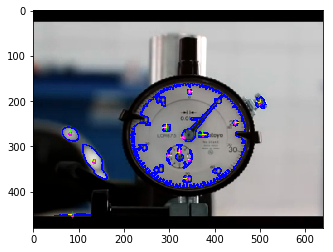

In [77]:
"""parser = argparse.ArgumentParser(description='Code for Introduction to Principal Component Analysis (PCA) tutorial.\
                                              This program demonstrates how to use OpenCV PCA to extract the orientation of an object.')
parser.add_argument('--input', help='Path to input image.', default='../Gauge/frames/frame1.jpg')
args = parser.parse_args()"""
src = cv.imread("../Gauge/frames/frame1.jpg")
# Check if image is loaded successfully
if src is None:
    print('Could not open or find the image: ')
    exit(0)
#plt.imshow(src)
# Convert image to grayscale
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
# Convert image to binary
_, bw = cv.threshold(gray, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
_, contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
for i, c in enumerate(contours):
    # Calculate the area of each contour
    area = cv.contourArea(c);
    # Ignore contours that are too small or too large
    if area < 1e2 or 1e5 < area:
        continue
    # Draw each contour only for visualisation purposes
    cv.drawContours(src, contours, i, (0, 0, 255), 2);
    #plt.imshow(src)
    # Find the orientation of each shape
    
    ###########################################################################
    sz = len(c)
    data_pts = np.empty((sz, 2), dtype=np.float64)
    for i in range(data_pts.shape[0]):
        data_pts[i,0] = c[i,0,0]
        data_pts[i,1] = c[i,0,1]
    # Perform PCA analysis
    mean = np.empty((0))    
    mean, M = cv.PCACompute(data_pts, mean)
    eigenvalues, eigenvectors = np.linalg.eig(M)
    print("Matrix", M)
    print("Mean" , mean)
    print("eigenvalues",eigenvalues)
    print("eigenvectors", eigenvectors)
    # Store the center of the object
    cntr = (int(mean[0,0]), int(mean[0,1]))
    
    
    cv.circle(src, cntr, 3, (255, 0, 255), 2)
    #plt.imshow(src)
    p1 = (cntr[0] + 0.02 * eigenvectors[0,0] * eigenvalues[0], cntr[1] + 0.02 * eigenvectors[0,1] * eigenvalues[0])
    p2 = (cntr[0] - 0.02 * eigenvectors[1,0] * eigenvalues[1], cntr[1] - 0.02 * eigenvectors[1,1] * eigenvalues[1])
    print("p1   ",p1)
    print("p2   ",p2)
    print("i",i)
    #************************************************************************#
    p = list(cntr)
    q = list(p1)
    scale=1
    colour=(0, 255, 0)
    
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians Rajat
    
    print("Rajatp1hypo", p[1])
    print("Rajatq1hypo", q[1])
    
    print("Rajatp0hypo", p[0])
    print("Rajatq0hypo", q[0])
    
    hypotenuse = 0.019994312474544272#sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    print("HYPO", hypotenuse)
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(src, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(src, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(src, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    #************************************************************************#
    
    
    #************************************************************************#
    p = list(cntr)
    q = list(p2)
    scale=5
    colour=(255, 255, 0)
    angle = atan2(p[1] - q[1], p[0] - q[0]) # angle in radians Kavita
    print("Kavitap1hypo", p[1])
    print("Kavitaq1hypo", q[1])
    
    print("Kavitap0hypo", p[0])
    print("Kavitaq0hypo", q[0])
    hypotenuse = 0.009999999999990905#sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))
    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)
    cv.line(src, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(src, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(src, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)
    #************************************************************************#
    
    
    
    #drawAxis(src, cntr, p1, (0, 255, 0), 1)
    #drawAxis(src, cntr, p2, (255, 255, 0), 5)
    angle = atan2(eigenvectors[0,1], eigenvectors[0,0]) # orientation in radians
    ###########################################################################
    #getOrientation(c, src)
plt.imshow(src)
#cv.waitKey()

In [71]:
sqrt((451 - 450.99) * (451 - 450.99) + (86 - 86.00) * (86 - 86.00))

0.009999999999990905

In [ ]:
0.019994312474544272